In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES']="0"
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from collections import defaultdict
from itertools import combinations
from itertools import chain
from collections import namedtuple
import pickle
import tensorflow as tf
import tflearn
import matplotlib.pyplot as plt
import os.path
import shutil
import inspect
from nn_lib import *
from train_procedures import *
from train_utils import *
import matplotlib.pyplot as plt
import json
from pprint import pprint
from copy import copy
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sys
np.random.seed(1997)
%load_ext autoreload
%autoreload 2

In [3]:
def load_history(base_dir):
    with open(os.path.join(base_dir,'history.pkl'),'rb') as f:
        h=pickle.load(f)
        if 'final_top1_accuracy_exemplar_mean_test' in h[-1]:
            return h,True
        else:
            return h,False

In [4]:
def load_hyper_params(base_dir):
    with open(os.path.join(base_dir,'hyper_params.json'),'rb') as f:
        h=json.load(f)
        return h   

In [5]:
def metric_plot(base_names,methods,labels,metric):
    assert len(base_names)==len(methods)
    assert len(base_names)==len(labels)
    for i,base_name in enumerate(base_names):
        h,finished=load_history(base_name)
        values=[]
        if finished:
            for j in range(len(h)-1):
                values.append(h[j][methods[i]][metric])

        else:
            for j in range(len(h)):
                values.append(h[j][methods[i]][metric])
        print(','.join(map(lambda x:str(x),values)))
        plt.plot(range(len(h)-1),values,label=labels[i])
    plt.ylim((0,1))
    plt.legend()

In [6]:
def support_size_plot(base_names,methods,metric,support_size):
    assert len(base_names)==len(methods)
    values=[]
    for i,base_name in enumerate(base_names):
        h,_=load_history(base_name)
        values.append(h[-2][methods[i]][metric])
    print('\t'.join(map(lambda x:str(x),values)))
    plt.plot(support_size,values)
    plt.ylim((0,1))

        

0.2	0.3175	0.49	0.5225	0.7175	0.75	0.7575	0.7725	0.7925	0.8125	0.81	0.8325	0.885


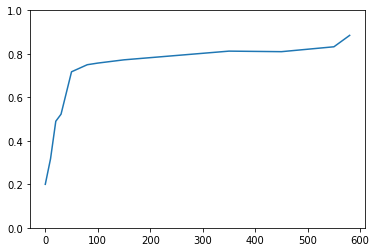

In [26]:
support_size_plot(base_names=['hela10_ft','hela10_supportnet_10exemplar','hela10_supportnet_20exemplar','hela10_supportnet_30exemplar','hela10_supportnet_50exemplar','hela10_supportnet_2','hela10_supportnet_100exemplar','hela10_supportnet_150exemplar','hela10_supportnet_250exemplar','hela10_supportnet_350exemplar','hela10_supportnet_450exemplar','hela10_supportnet_550exemplar','hela10_58supportnet'],
                  methods=['best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul'],                  
                  metric='top1_accuracy',
                  support_size=[0,10,20,30,50,80,100,150,250,350,450,550,580])

1.0,0.39375,0.24583333333333332,0.196875,0.2
1.0,0.8125,0.5875,0.234375,0.3175
0.9875,0.89375,0.5875,0.51875,0.49
1.0,0.8875,0.6083333333333333,0.509375,0.5225
1.0,0.9625,0.7625,0.59375,0.7175
1.0,0.9625,0.8291666666666667,0.721875,0.75
1.0,0.9625,0.85,0.70625,0.7575
1.0,0.9125,0.7916666666666666,0.721875,0.7725
1.0,0.9375,0.8791666666666667,0.7875,0.7925
1.0,0.96875,0.9,0.790625,0.8125
1.0,0.98125,0.8791666666666667,0.80625,0.81
1.0,0.98125,0.8916666666666667,0.84375,0.8325
1.0,0.9625,0.8875,0.840625,0.885


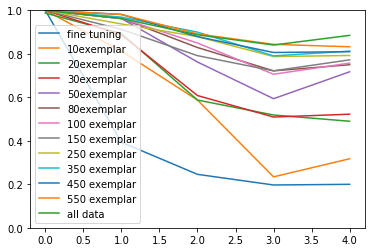

In [12]:
metric_plot(base_names=['hela10_ft','hela10_supportnet_10exemplar','hela10_supportnet_20exemplar','hela10_supportnet_30exemplar','hela10_supportnet_50exemplar','hela10_supportnet_2','hela10_supportnet_100exemplar','hela10_supportnet_150exemplar','hela10_supportnet_250exemplar','hela10_supportnet_350exemplar','hela10_supportnet_450exemplar','hela10_supportnet_550exemplar','hela10_58supportnet'],
            methods=['best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul'],
            labels=['fine tuning','10exemplar','20exemplar','30exemplar','50exemplar','80exemplar','100 exemplar','150 exemplar','250 exemplar','350 exemplar','450 exemplar','550 exemplar','all data'],
            metric='top1_accuracy')

1.0,0.995,0.8533333333333334,0.815
1.0,0.89,0.843333333333,0.7675
1.0,1.0,0.99,0.9925
0.99,0.495,0.30333333333333334,0.235
0.93,0.5,0.3,0.2225


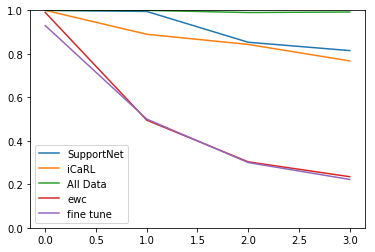

In [36]:
metric_plot(base_names=['breakhis_supportnet_45epoch','breakhis_icarl_full_epoch','breakhis_nonincremental_45epoch','breakhis_ewc_only','breakhis_fine_tune'],
            methods=['best_plain_after_cumul','best_exemplar_mean_cumul','best_plain_before_cumul','best_plain_before_cumul','best_plain_before_cumul'],
            labels=['SupportNet','iCaRL','All Data','ewc','fine tune'],
            metric='top1_accuracy')

1.0,0.9625,0.8875,0.840625,0.885
1.0,0.9625,0.8291666666666667,0.721875,0.75
0.9875,0.925,0.775,0.678125,0.665
1.0,0.96875,0.891666666667,0.7625,0.7575
1.0,0.9625,0.8291666666666667,0.734375,0.765


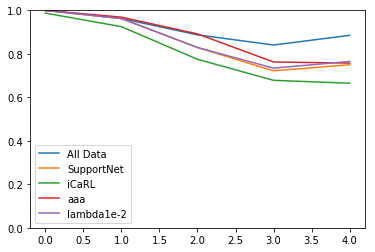

In [10]:
metric_plot(base_names=['hela10_58supportnet','hela10_supportnet_2','hela10_icarl','hela10_aaa','hela10_fix_lambda1e-2'],
            methods=['best_plain_before_cumul','best_plain_before_cumul','best_exemplar_mean_cumul','best_exemplar_mean_cumul','best_plain_before_cumul'],
            labels=['All Data','SupportNet','iCaRL','aaa','lambda1e-2'],
            metric='top1_accuracy')

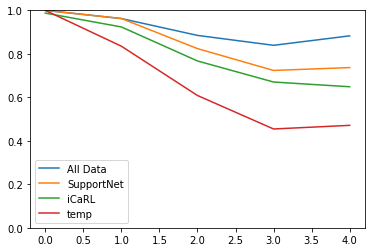

In [24]:
h1=load_history('hela10_58supportnet')
accuracy1=[]
h2=load_history('hela10_supportnet_2')
accuracy2=[]
h3=load_history('hela10_icarl')
accuracy3=[]
h4=load_history('hela10_temp')
accuracy4=[]
for i in range(len(h)-1):
    accuracy1.append(h1[i]['best_plain_before_cumul']['f1_macro'])
    accuracy2.append(h2[i]['best_plain_before_cumul']['f1_macro'])
    accuracy3.append(h3[i]['best_exemplar_mean_cumul']['f1_macro'])
    accuracy4.append(h4[i]['best_plain_before_cumul']['f1_macro'])

plt.plot(range(len(h)-1),accuracy1,label='All Data')
plt.plot(range(len(h)-1),accuracy2,label='SupportNet')
plt.plot(range(len(h)-1),accuracy3,label='iCaRL')
plt.plot(range(len(h)-1),accuracy4,label='temp')
plt.ylim((0,1))
plt.legend()